In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
# print the dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# print the shape of the dataset
df.shape

(32560, 15)

In [5]:
# Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
# lets check the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we see we have some object type data also available in dataset


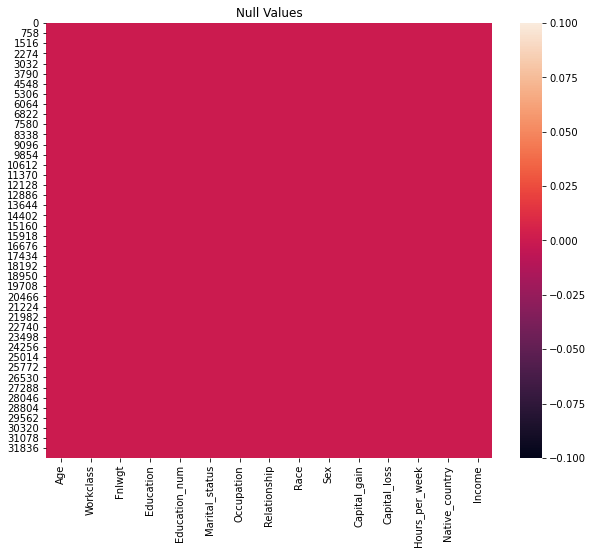

In [8]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

### As we see there is no missing value in our dataset from above method but if we look at our dataset we have some ? in our columns, so we will check for those ?

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
# lets print the unique value of our dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

So i can notice that there are some '?' entries in Workclass, Occupation and Native_country column.

So i have replace this '?' with the mode of the above columns.Since they are categorical columns.

In [12]:
# let's check the mode of Workclass column 
df["Workclass"].mode()  # we will fill the '?' values with this mode value

0     Private
dtype: object

Mode for Workclass column is 'Private'

In [13]:
#Replacing '?' with mode value
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

In [14]:
# let's check the mode of Occupation column 
df["Occupation"].mode()  # we will fill the '?' values with this mode value

0     Prof-specialty
dtype: object

Mode of Occupation column is 'Prof-specialty'.

In [15]:
#Replacing '?' with mode value
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

In [16]:
# let's check the mode of Native_country column 
df["Native_country"].mode()  # we will fill the '?' values with this mode value

0     United-States
dtype: object

Mode of Native_country column is 'United-States'

In [17]:
#Replacing '?' with mode value
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [18]:
#Checking the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In this perticular Capital_gain column there are more zero values so we can drop this column.

In [19]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

In [20]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

same as Capital_gain column Capital_loss also having more zero values so we can drop this column.

In [21]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

In [22]:
#Checking description of data set
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


# Visualization

In [23]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns.

In [24]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Above are the list of numerical columns

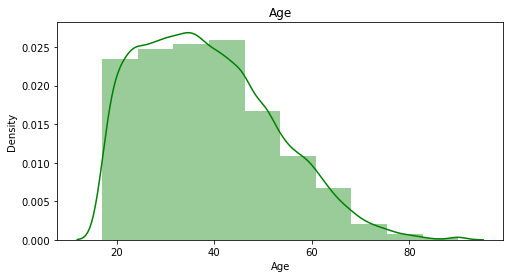

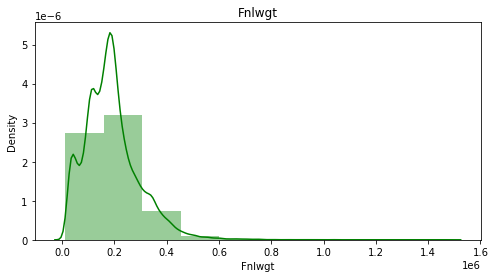

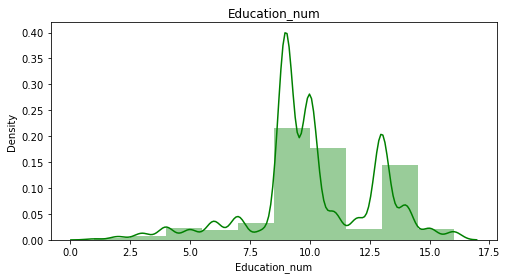

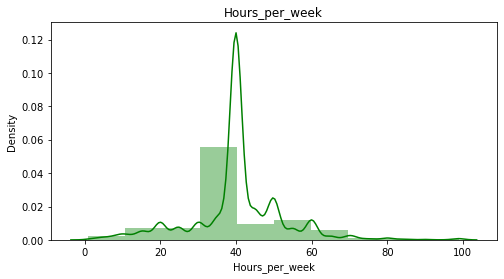

In [25]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

All the numerical columns are skewed but skewness is less in case of Age

<AxesSubplot:xlabel='Income', ylabel='count'>

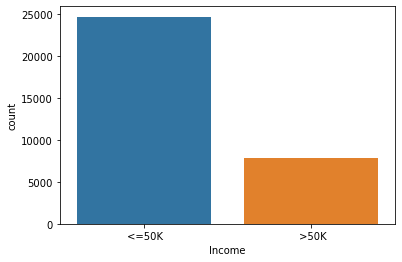

In [26]:
#Count plot for Income
sns.countplot(df['Income'])

By looking into the count plot of target we can say that there is a data imbalancing issue.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

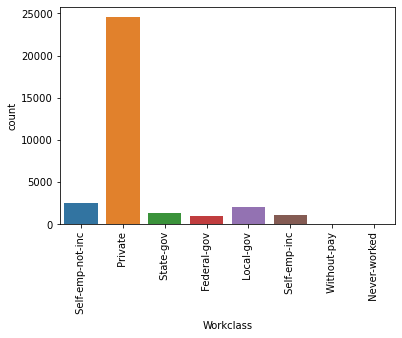

In [27]:
#Count plot for Workclas
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
#Count plot for Workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)

 maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

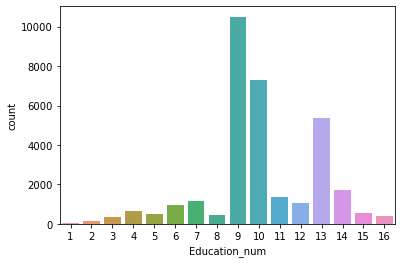

In [28]:
#Count plot for Education_num
sns.countplot(df['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

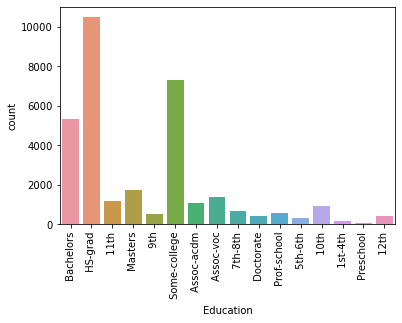

In [29]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90)

Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

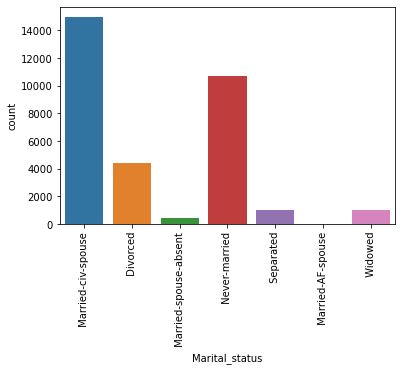

In [30]:
#Count plot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

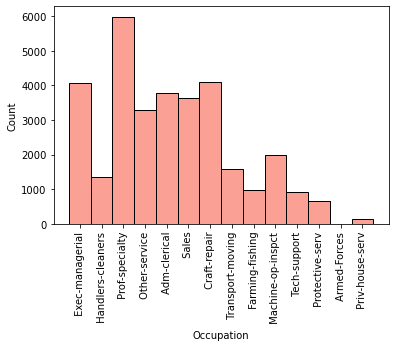

In [31]:
#Hist plot for Occupation
sns.histplot(df['Occupation'],color='salmon')
plt.xticks(rotation=90)

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count

In [32]:
#Checking the value count of Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

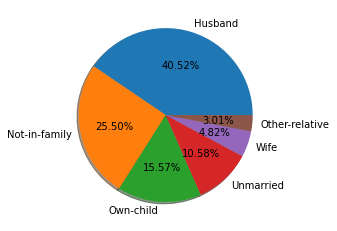

In [33]:
#Ploting pie chart for Relationship
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie chart most of the count is with Husband, Not-in-family and own-child

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

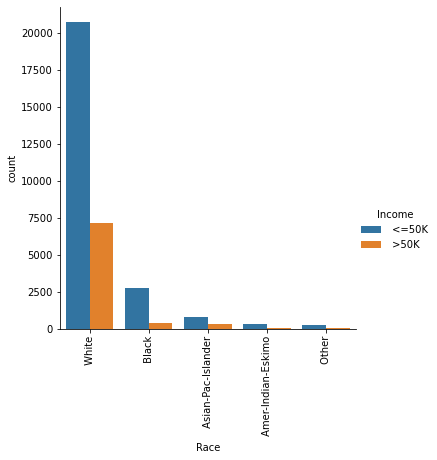

In [34]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90)

In US white people have more chance of getting job than any other raced people

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

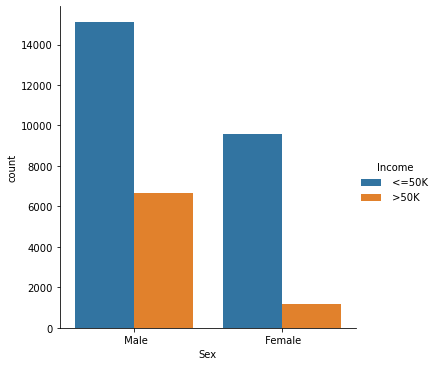

In [35]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0)

Irrespective of income males have high count of getting job than women.And men also has high count of getting income >50k per year

In [36]:
#Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

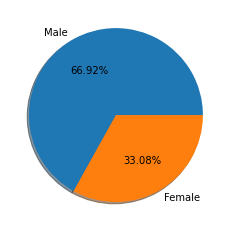

In [37]:
#Ploting pie chart for Sex
labels='Male','Female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the working people about 67% are male and women workers are less in number

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

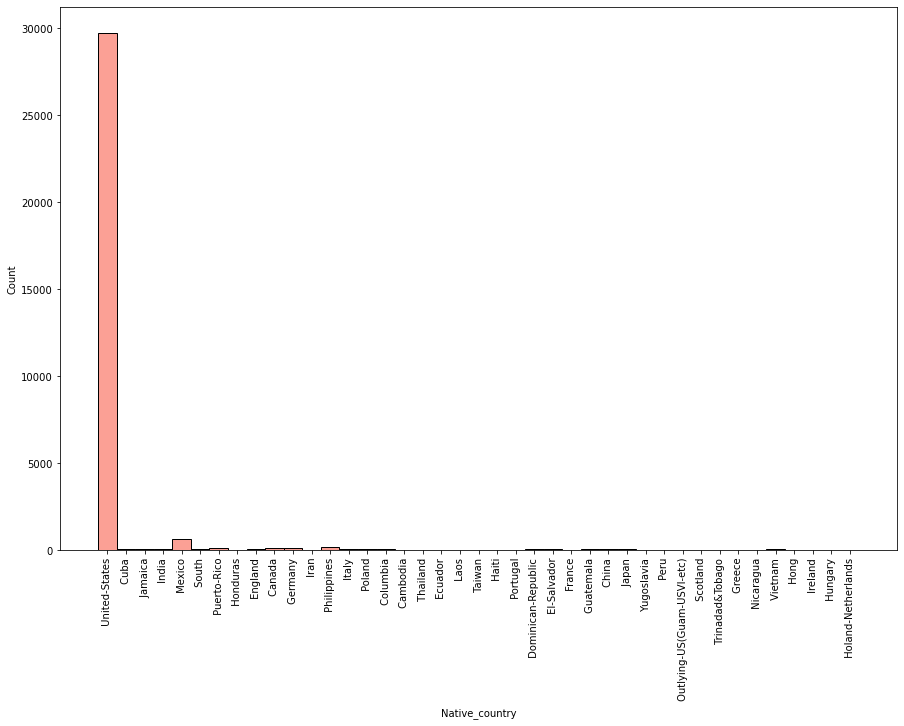

In [38]:
#Hist plot for Native_country
plt.figure(figsize=[15,10])
sns.histplot(df['Native_country'],color='salmon')
plt.xticks(rotation=90)

## Checking for outliers

<AxesSubplot:>

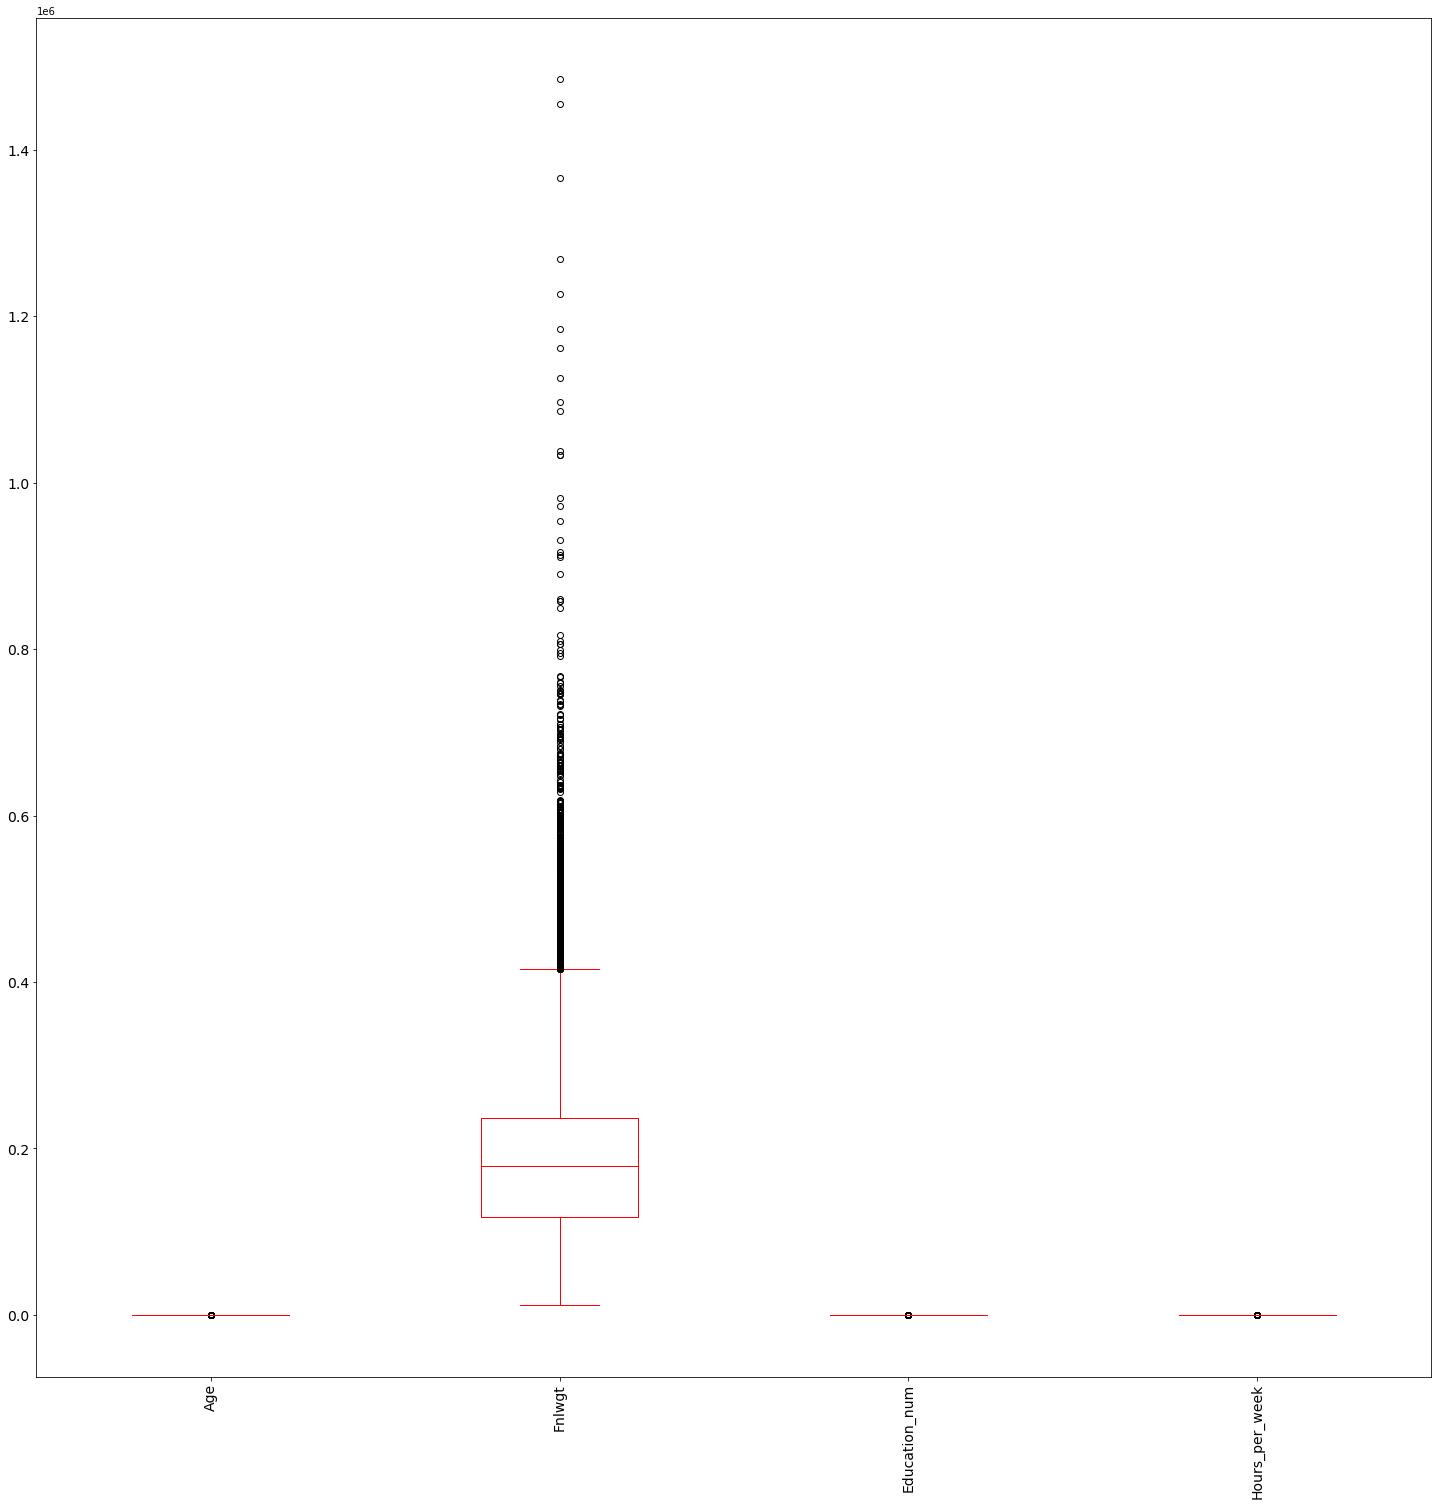

In [39]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

# Removing outliers

In [40]:
#Taking all the column names with outliers as a list
dfoutliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

#### Zscore method

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [42]:
#Checking shape of new dataset
df_new.shape
(31461, 13)

(31461, 13)

In [43]:
#Checking for skewness
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

#### Removing skewness using yeo-johnson method

In [44]:
f=["Fnlwgt"]

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
df_new[f] = scaler.fit_transform(df_new[f].values)

In [47]:
#lets chcek the skewness again
df_new.skew()

Age               0.472279
Fnlwgt           -0.034507
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

now skewness has been removed

# Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[categorical_columns]= df_new[categorical_columns].apply(LE.fit_transform)

In [49]:
df_new[categorical_columns].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


In [50]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,38,0


# Checking correlation using heat map

<AxesSubplot:>

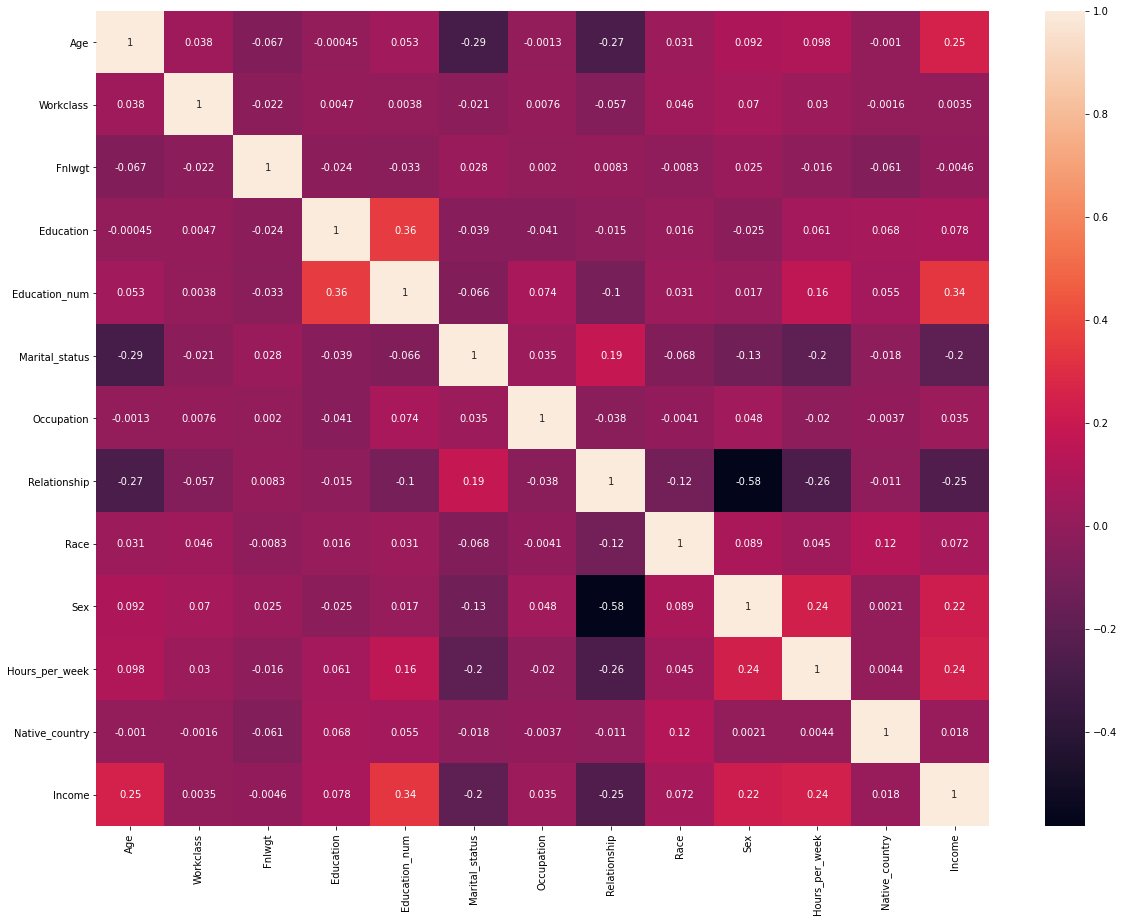

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(), annot = True)

By looking into the heat map i can say that there is no multicolinearity issue.
Workclass and Fnlwgt has very less correlation with target.
Native_country, Occupation, Race and Education has less correlation with target column.

# Separating features and label

In [52]:
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

#### Scaling the data using standard scaler

In [53]:
sca=StandardScaler()
X = pd.DataFrame(sca.fit_transform(x), columns=x.columns)

In [54]:
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.114171,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.427192,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.607320,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.487719,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.048962,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062


### Balancing the target variable using oversampling

In [55]:
!pip install -U imbalanced-learn

In [56]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)


In [57]:
# Checking the value counts again
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

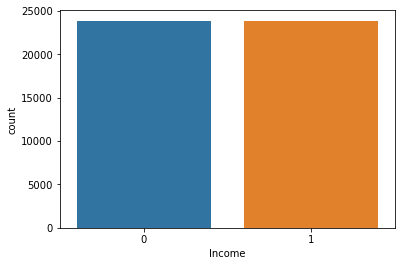

In [58]:
# Visualizing the data after oversampling
sns.countplot(y)

Now the data looks beautifully balanced

## Finding Best Random State and Accuracy

In [59]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8869480156512017  on Random_state  86


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=86)

In [61]:
X_train.shape

(33394, 12)

In [63]:
X_test.shape

(14312, 12)

In [64]:
y_train.shape

(33394,)

In [65]:
y_test.shape

(14312,)

# Classification Algorithms

In [68]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## i) DecisionTreeClassifier

In [69]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8325880380100615
Confusion Matrix: [[5931 1205]
 [1191 5985]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7136
           1       0.83      0.83      0.83      7176

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



DTC is giving 83% accuracy

### ii)RandomForestClassifier

In [70]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8819172722191169
Confusion Matrix: [[6188  948]
 [ 742 6434]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7136
           1       0.87      0.90      0.88      7176

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



RFC is giving 88% accuracy

### iii) SupportVectorClassifier

In [71]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8181246506428173
Confusion Matrix: [[5385 1751]
 [ 852 6324]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.81      7136
           1       0.78      0.88      0.83      7176

    accuracy                           0.82     14312
   macro avg       0.82      0.82      0.82     14312
weighted avg       0.82      0.82      0.82     14312



SVC is giving 82% accuracy

### iv) LogisticRegression

In [74]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
predLR=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predLR))
print('Confusion Matrix:',confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

Accuracy Score: 0.7479737283398546
Confusion Matrix: [[5188 1948]
 [1659 5517]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7136
           1       0.74      0.77      0.75      7176

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



LR is giving 75% accuracy

### v) Gradient Boosting Classifier

In [73]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8555757406372275
Confusion Matrix: [[5829 1307]
 [ 760 6416]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7136
           1       0.83      0.89      0.86      7176

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



GBC is giving 85% accuracy

### vi) K-Neighbor Classifier

In [75]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8400642817216322
Confusion Matrix: [[5416 1720]
 [ 569 6607]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      7136
           1       0.79      0.92      0.85      7176

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



Knn is giving 84% accuracy

# Cross Validation Score

In [77]:
#Importing library
from sklearn.model_selection import cross_val_score

In [78]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8293942187443258


In [79]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8843138190062849


In [80]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8211757743736608


In [81]:
# cv score for Logistic Regression 
print(cross_val_score(LR,X,y,cv=5).mean())

0.7467405890113054


In [82]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8488879761299352


In [83]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.8491388981894179


By looking into the difference of model accuracy and cross validation score i found that RFC as best model

# Hyper Parameter tuning

In [84]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [85]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [86]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [87]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [88]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [89]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 400}

In [90]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=400)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

88.35941866964785


I got best model as RFC and i got the accuracy 88.35% after tunning which is good.!!!!

# ROC-AUC curve

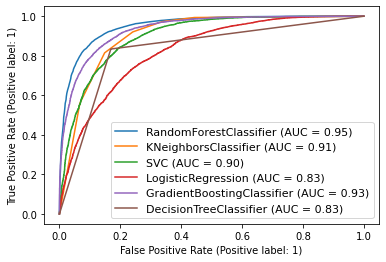

In [91]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving the model

In [92]:
import pickle

In [93]:
filename= 'Census_income_project'
pickle.dump(Final_mod, open(filename,'wb'))